In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [32]:
data = pd.read_csv("csv_files/shop data.csv")
data.head()

,age,income,gender,m_status,buys
0,<25,high,male,single,no
1,<25,high,male,married,no
2,25-35,high,male,single,yes
3,>35,medium,male,single,yes
4,>35,low,female,single,yes


### Splitting X and Y

In [33]:
x = data.drop(columns=['buys'], axis=1)
x.head()

,age,income,gender,m_status
0,<25,high,male,single
1,<25,high,male,married
2,25-35,high,male,single
3,>35,medium,male,single
4,>35,low,female,single


In [34]:
y = data[['buys']]
y.head()

,buys
0,no
1,no
2,yes
3,yes
4,yes


### Encoding

In [35]:
label_encoder = LabelEncoder()
x = x.apply(label_encoder.fit_transform)
x.head()

,age,income,gender,m_status
0,1,0,1,1
1,1,0,1,0
2,0,0,1,1
3,2,2,1,1
4,2,1,0,1


### Splitting Train Test

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

### Decision Tree

In [57]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [58]:
y_pred = model.predict(x_test)
y_pred

array(['yes', 'no', 'yes', 'no', 'yes', 'yes'], dtype=object)

In [59]:
accuracy_score(y_test, y_pred)

0.8333333333333334

[Text(0.3333333333333333, 0.9, 'age <= 0.5\ngini = 0.469\nsamples = 16\nvalue = [6, 10]'),
 Text(0.2222222222222222, 0.7, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.2777777777777778, 0.8, 'True  '),
 Text(0.4444444444444444, 0.7, 'gender <= 0.5\ngini = 0.5\nsamples = 12\nvalue = [6, 6]'),
 Text(0.38888888888888884, 0.8, '  False'),
 Text(0.2222222222222222, 0.5, 'age <= 1.5\ngini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(0.1111111111111111, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.3333333333333333, 0.3, 'income <= 1.5\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.2222222222222222, 0.1, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4444444444444444, 0.1, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.6666666666666666, 0.5, 'income <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.5555555555555556, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7777777777777778, 0.3, 'm_status <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1

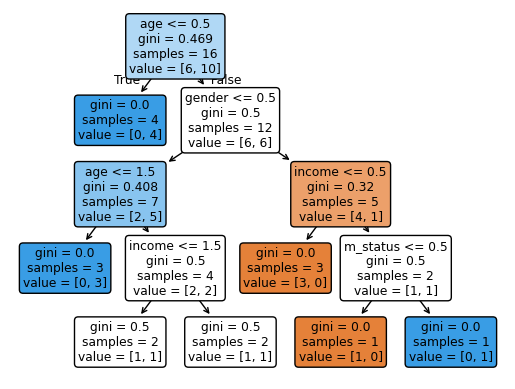

In [61]:
from sklearn import tree

tree.plot_tree(model, rounded=True, filled=True, feature_names=x.columns)